# ESS330 Final Project

Mel Balcarcel Arias (Colorado State University)  
Sean Walsh (Colorado State University)

# Introduction, Background, and Motivation

hi

# Data Exploration

In [ ]:
plot_data <- read.csv("PlotData.csv")
tree_data <- read.csv("TreeData.csv")
fireincidents <- read.csv("California_Fire_incidents.csv")

## Plot data for the trees a mixed conifer forest in Sierra Nevada

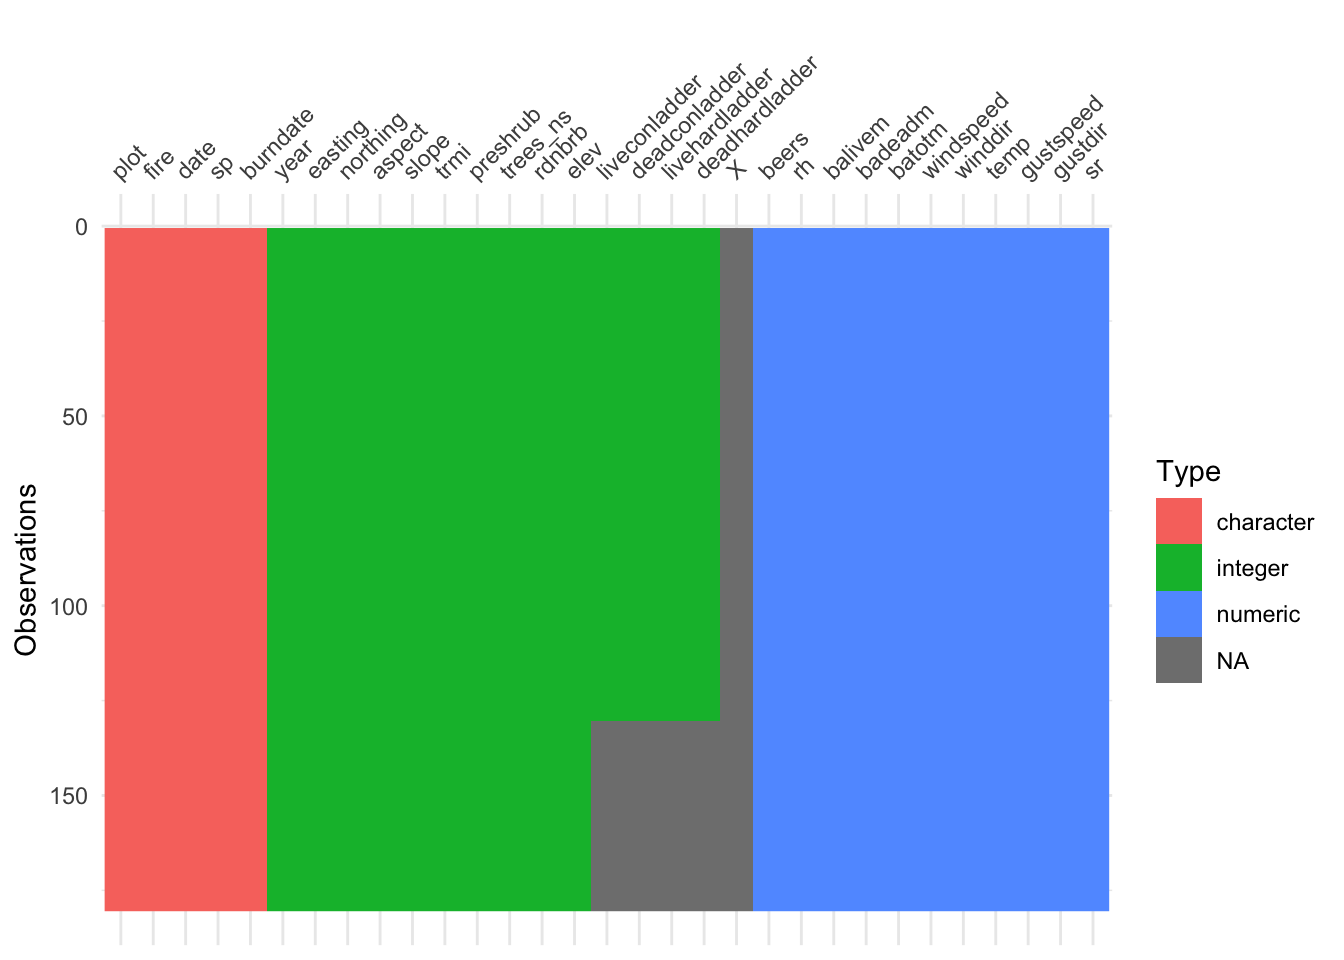

In [ ]:
visdat::vis_dat(plot_data)

## More in Depth data for the trees and bark beetle presence

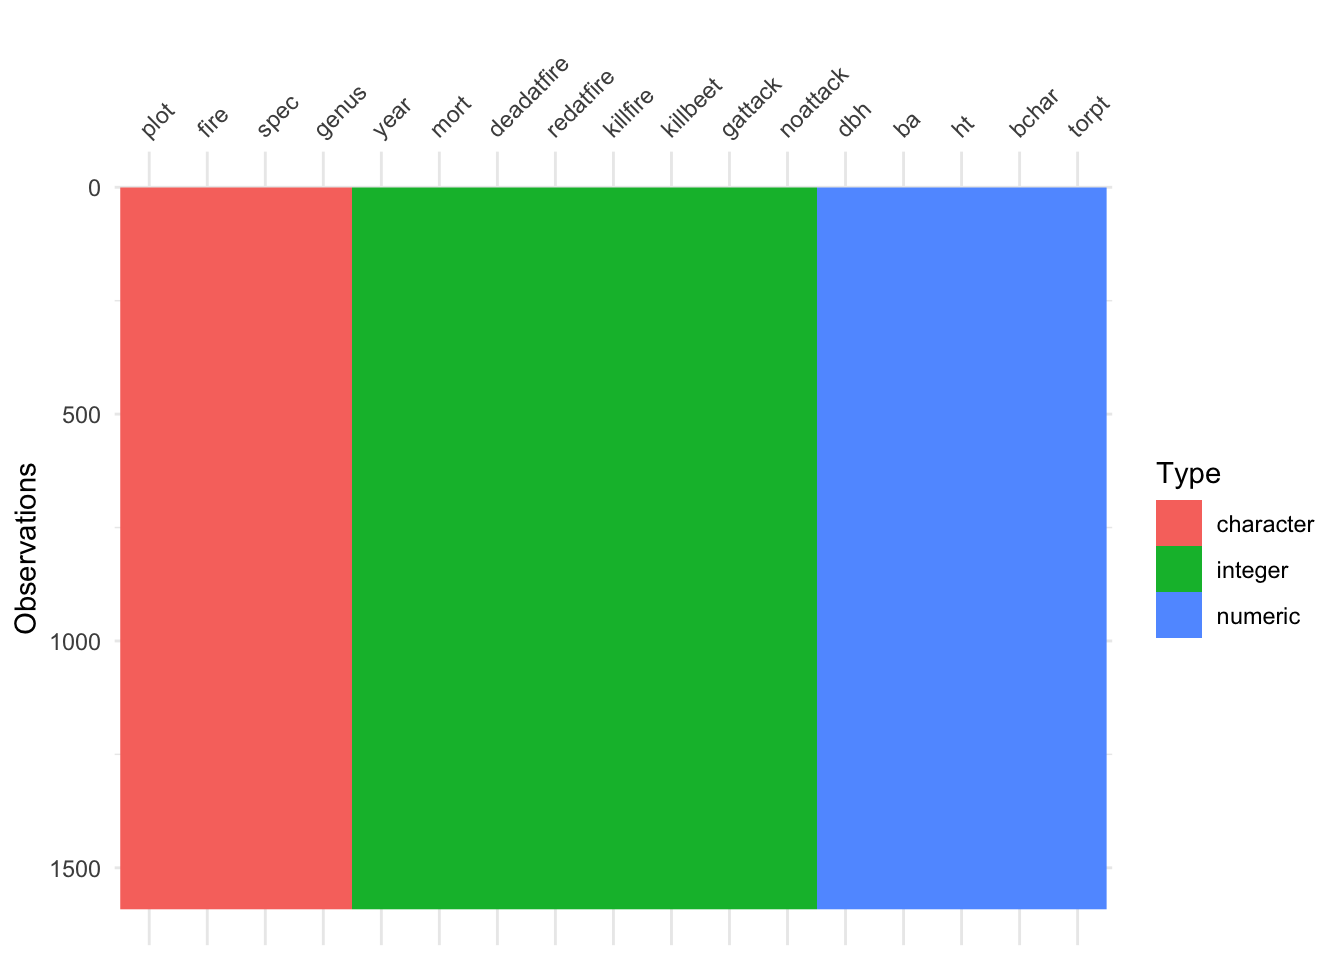

In [ ]:
visdat::vis_dat(tree_data)

In [ ]:
library(readxl)
library(DT)

data <- read_excel("Metadata.xlsx")
datatable(data, options = list(pageLength = 10), rownames = FALSE)

## Fires in California between 2013-2019

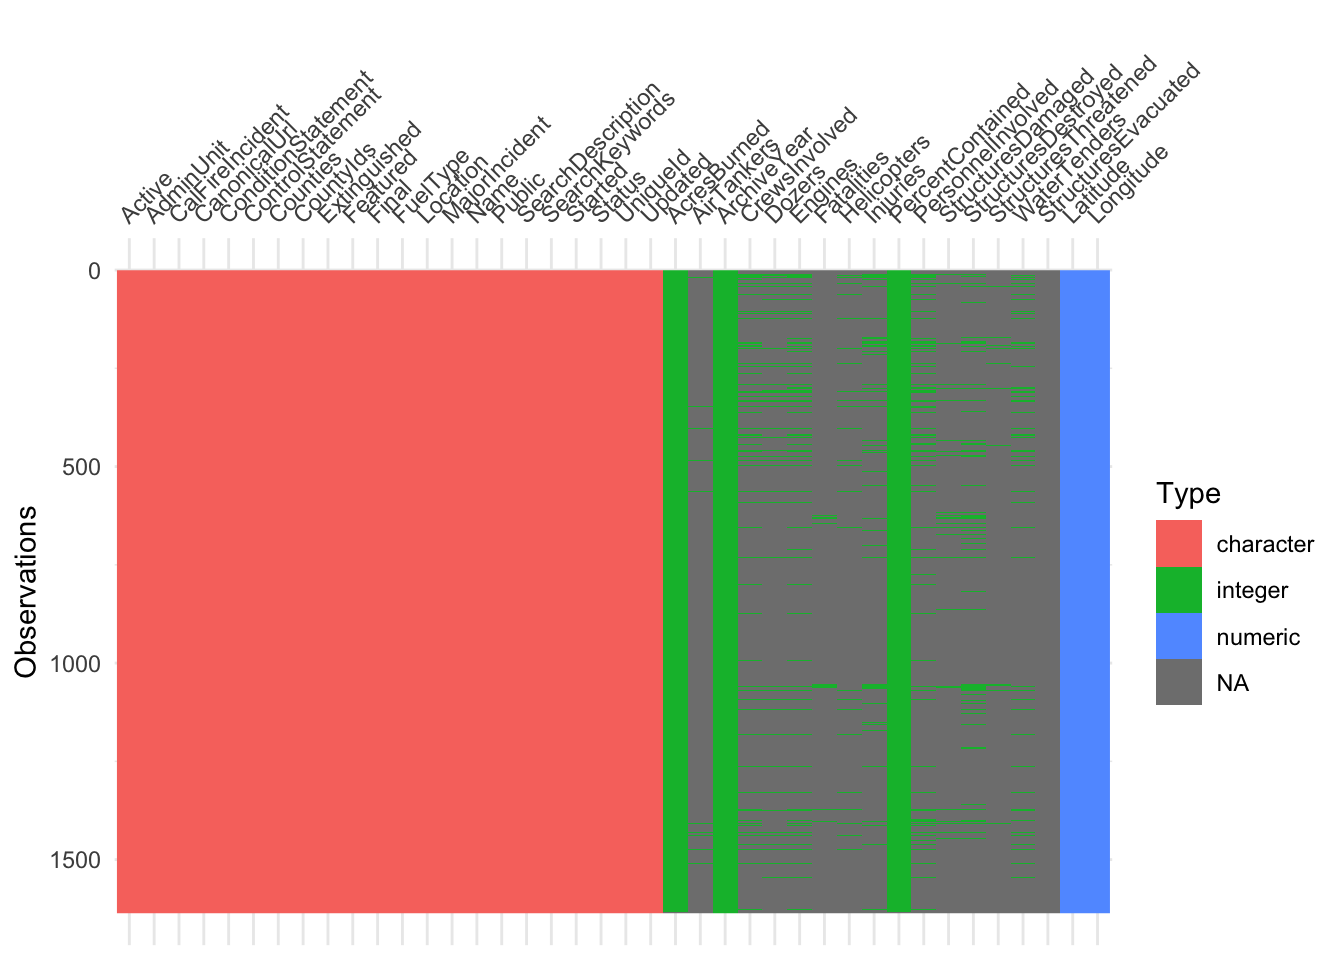

In [ ]:
visdat::vis_dat(fireincidents)

# Methods Identification

hi